In [26]:
import sys
#print(sys.path)
#sys.path.remove('/work/projects/project01456/lent/cases/scripts/modules')
print(sys.path)
import dataframeWithMetadata as dfmd
import dataAgglomeration as da
import os
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams["figure.dpi"] = 400
idx = pd.IndexSlice


['/work/groups/da_mma_b/jun/argo/cases/hydrodynamic/risingBubble', '', '/work/projects/project01456/pyfoam/lib64/python3.6/site-packages', '/work/groups/da_mma_b/jun/argo/cases/hydrodynamic/risingBubble/PYTHONPATH', '/work/groups/da_mma_b/jun/argo/cases/scripts/modules', '/shared/apps/.gcc/10.2/.openmpi/4.0/python/3.9.5/lib/python39.zip', '/shared/apps/.gcc/10.2/.openmpi/4.0/python/3.9.5/lib/python3.9', '/shared/apps/.gcc/10.2/.openmpi/4.0/python/3.9.5/lib/python3.9/lib-dynload', '/home/jl95muce/.local/lib/python3.9/site-packages', '/shared/apps/.gcc/10.2/.openmpi/4.0/python/3.9.5/lib/python3.9/site-packages', '/shared/apps/.gcc/10.2/.openmpi/4.0/python/3.9.5/lib/python3.9/site-packages/IPython/extensions', '/work/home/jl95muce/.ipython']


In [27]:
def dB_plot(path, num, label):
    db =  pd.read_csv('RisingBubbleRefDat/%s.txt'%path, header=None,delim_whitespace=True)
    plt.plot(db[0],db[num],'-',ms=3,label=label)
    
def dB_plot_foam(df, tScheme, divScheme, col, solver):
    db =  df.loc[idx[tScheme, divScheme]]
    CFLs = db.index.get_level_values("CFL_num").unique()
    for CFL in CFLs:
        db_sub=db.loc[CFL]
        plt.plot(db_sub['time'],db_sub[col],'-.',label='%s, %s, %s, CFL: %s, Resol: 320x160'%(solver,tScheme,divScheme,CFL))

In [28]:
agglomerator = da.data_agglomerator("./risingBubble2D_Hysing2009.parameter","risingBubbleOutput.csv", 
                                     "./interIsoFoam-risingBubble2D_Hysing2009_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("interIsoFoam_Hysing2009.csv")
interIso_df = agglomerator.study_dataframe()
interIso_df = interIso_df.sort_index()

agglomerator = da.data_agglomerator("./risingBubble2D_Hysing2009.parameter","risingBubbleOutput.csv", 
                                     "./interIsoRhoFoam-risingBubble2D_Hysing2009_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("interIsoRhoFoam_Hysing2009.csv")
interIsoRho_df = agglomerator.study_dataframe()
interIsoRho_df = interIsoRho_df.sort_index()

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
[['CrankNicolson0.9', 'Euler'], ['limitedLinearV1', 'upwind'], [0.05, 0.5], [160], [-0.98], [1.96], [0.1], [1], [0.01], [1000], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['timeSchemes', 'fluxSchemes', 'CFL_num', 'resolution', 'g', 'surface_tension_coefficient', 'nu_ambient', 'rho_ambient', 'nu_droplet', 'rho_droplet', 'step']
Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
[['CrankNicolson0.9', 'Euler'], ['limitedLinearV1', 'upwind'], [0.05, 0.5], [160], [-0.98], [1.96], [0.

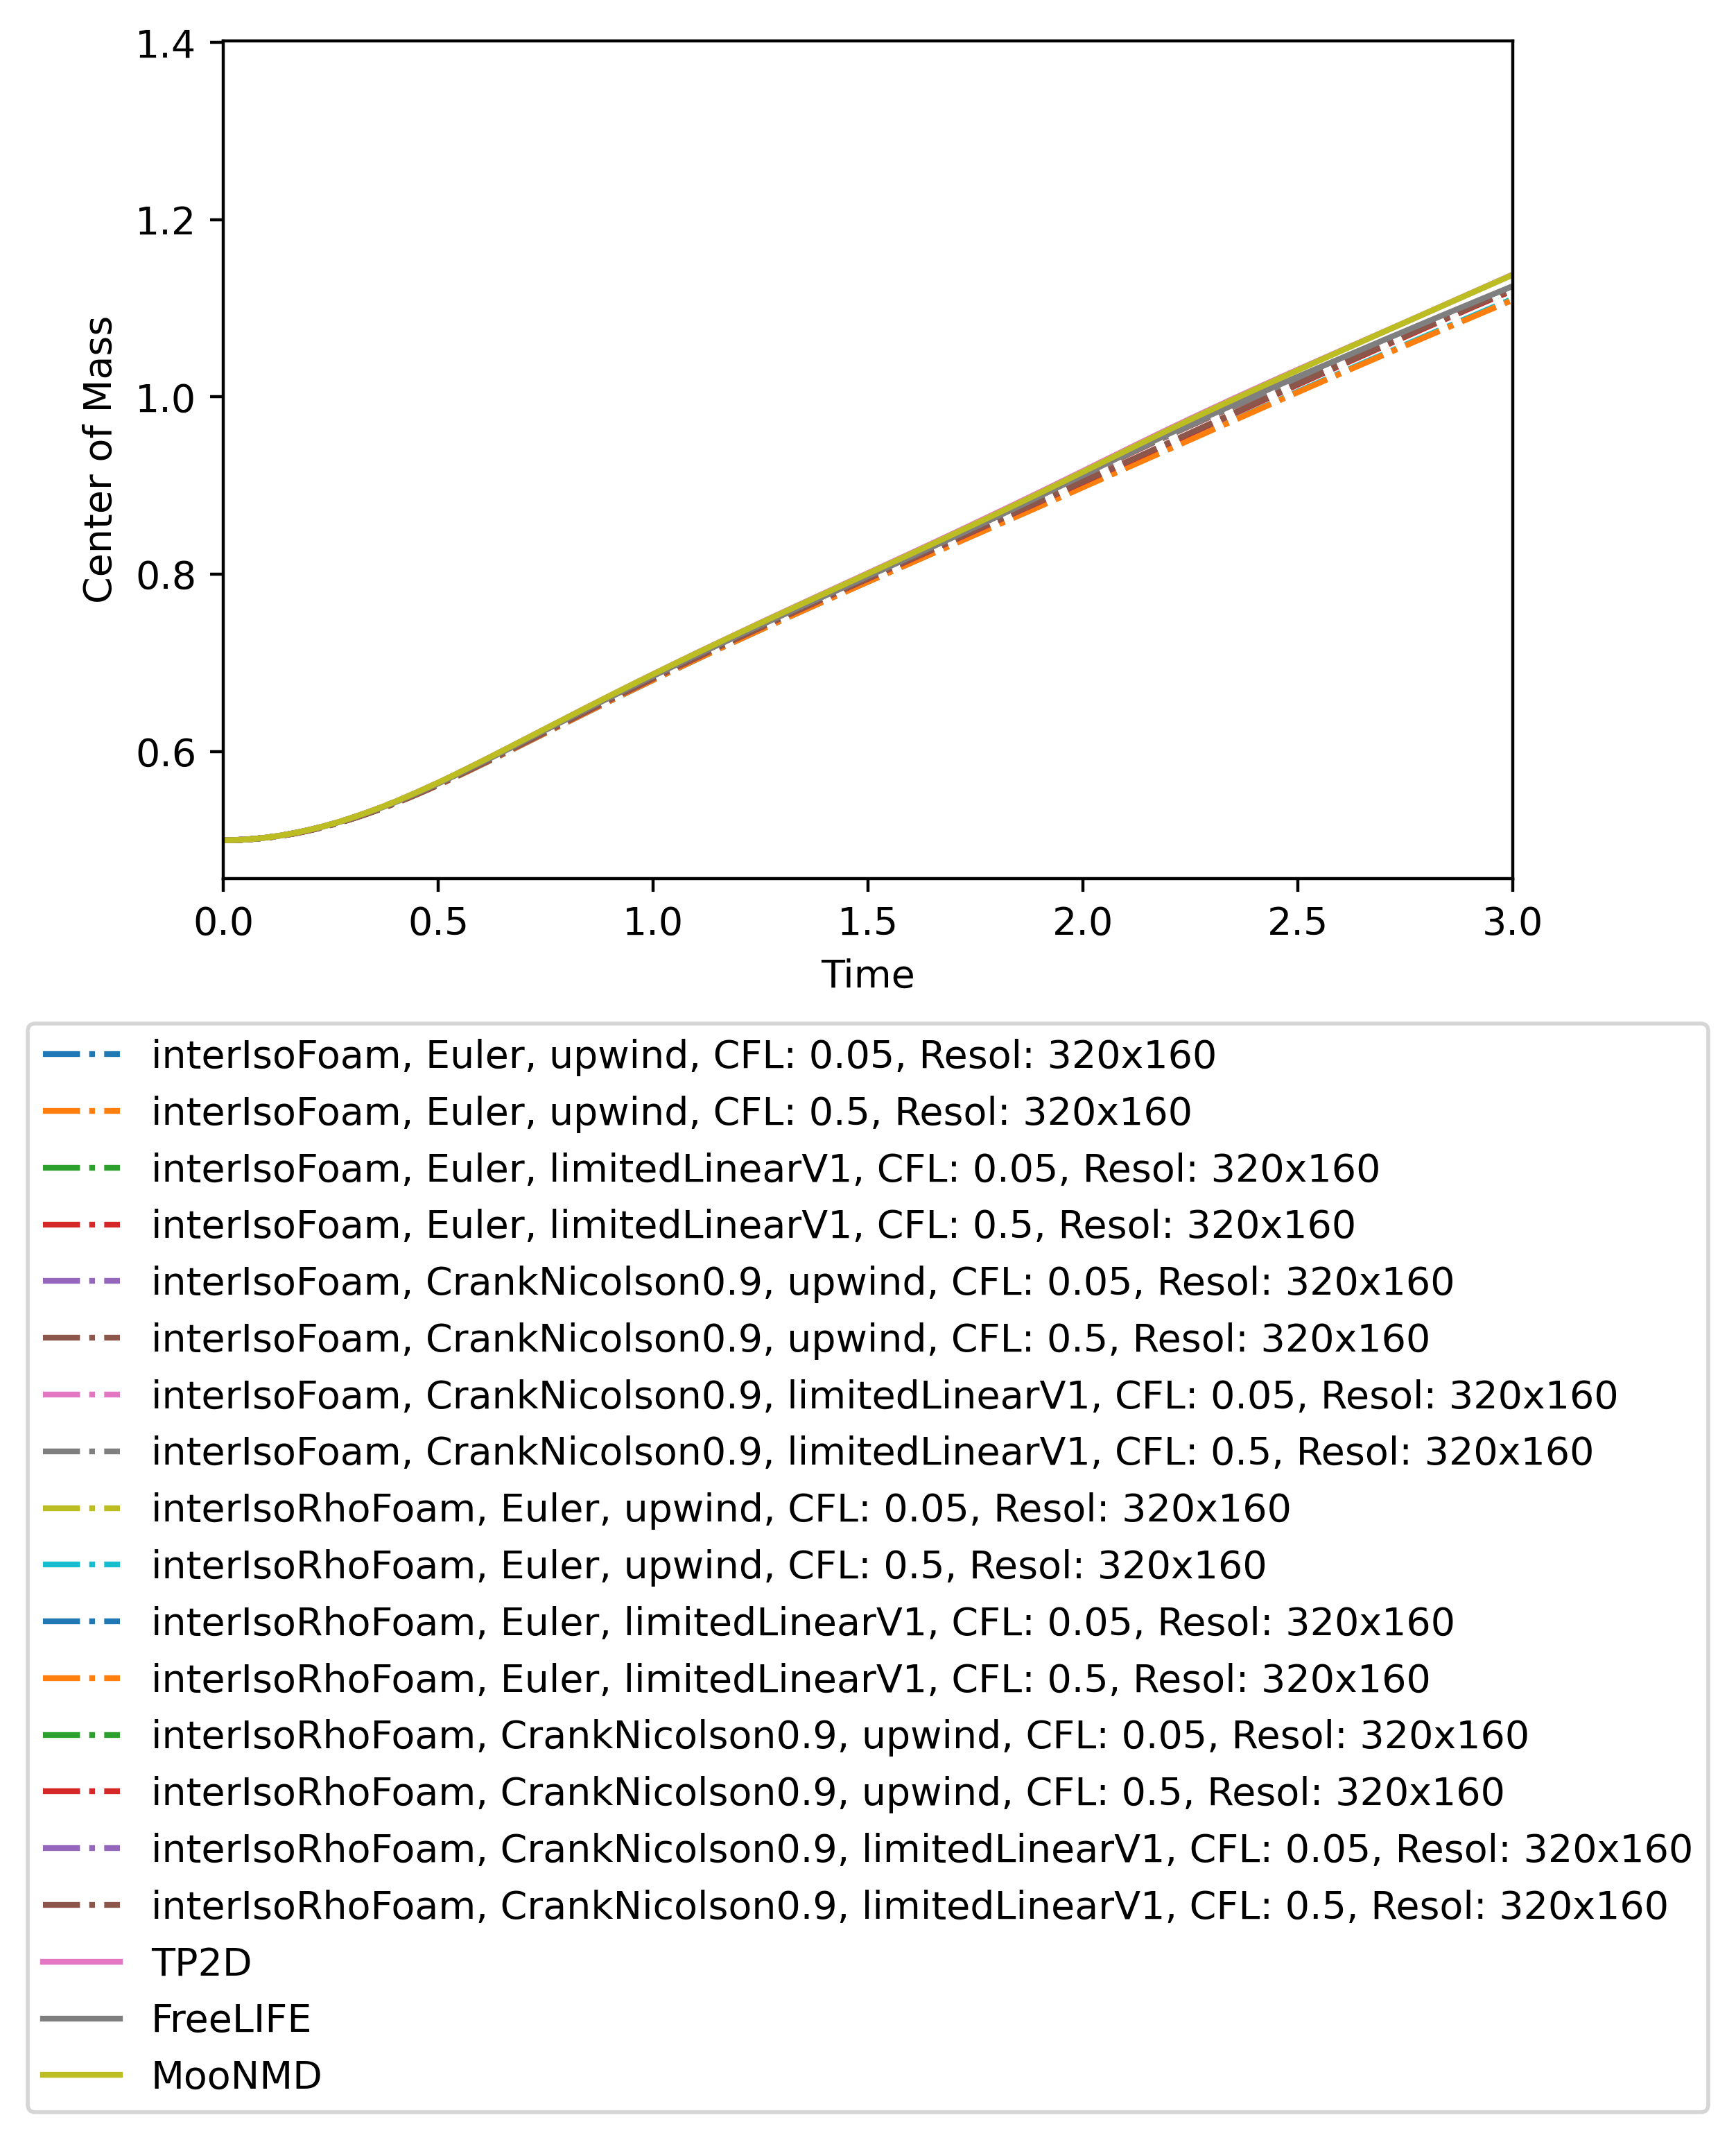

In [33]:

dB_plot_foam(interIso_df, 'Euler','upwind','CenterOfMass','interIsoFoam')
dB_plot_foam(interIso_df, 'Euler','limitedLinearV1','CenterOfMass','interIsoFoam')
dB_plot_foam(interIso_df, 'CrankNicolson0.9','upwind','CenterOfMass','interIsoFoam')
dB_plot_foam(interIso_df, 'CrankNicolson0.9','limitedLinearV1','CenterOfMass','interIsoFoam')
dB_plot_foam(interIsoRho_df, 'Euler','upwind','CenterOfMass','interIsoRhoFoam')
dB_plot_foam(interIsoRho_df, 'Euler','limitedLinearV1','CenterOfMass','interIsoRhoFoam')
dB_plot_foam(interIsoRho_df, 'CrankNicolson0.9','upwind','CenterOfMass','interIsoRhoFoam')
dB_plot_foam(interIsoRho_df, 'CrankNicolson0.9','limitedLinearV1','CenterOfMass','interIsoRhoFoam')

dB_plot('c2g1l8', 3, 'TP2D')
dB_plot('c2g2l3', 3, 'FreeLIFE')
dB_plot('c2g3l4', 3, 'MooNMD')

plt.ylabel("Center of Mass")
plt.xlabel("Time")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))#,frameon=False)
plt.xlim(0,3)
# plt.ylim(1,6.3)
plt.show()

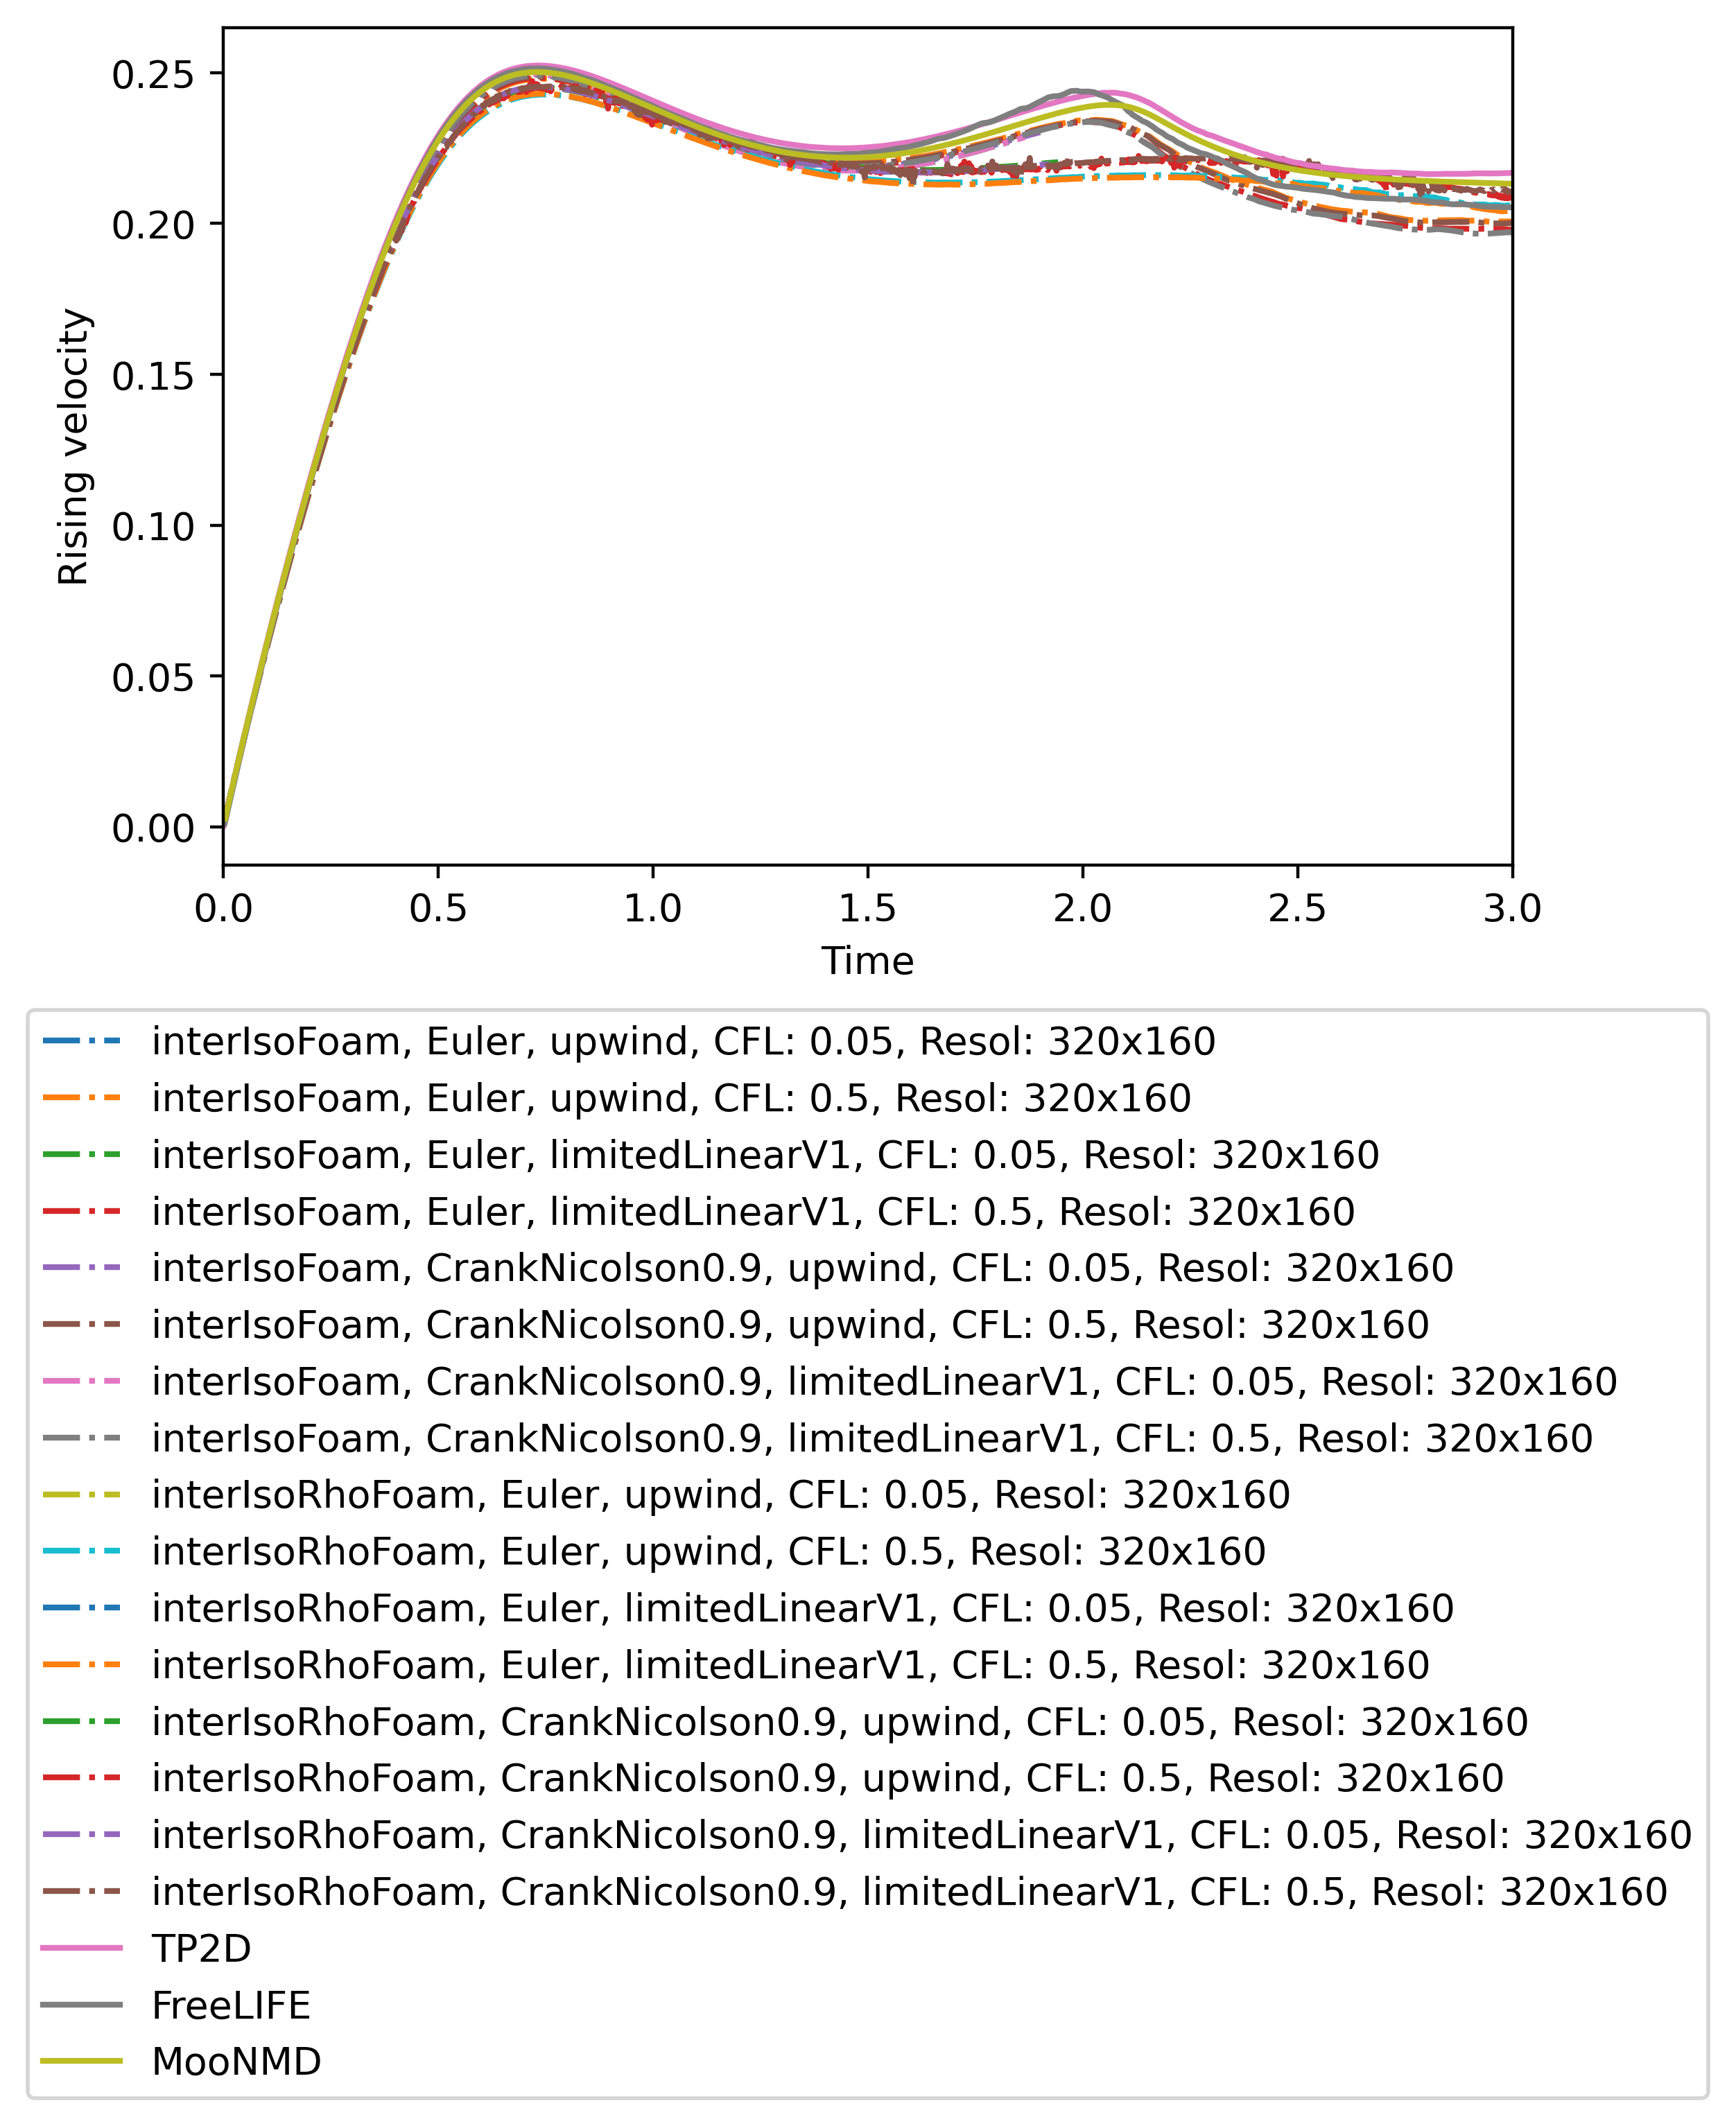

In [34]:

dB_plot_foam(interIso_df, 'Euler','upwind','RisingVelocity','interIsoFoam')
dB_plot_foam(interIso_df, 'Euler','limitedLinearV1','RisingVelocity','interIsoFoam')
dB_plot_foam(interIso_df, 'CrankNicolson0.9','upwind','RisingVelocity','interIsoFoam')
dB_plot_foam(interIso_df, 'CrankNicolson0.9','limitedLinearV1','RisingVelocity','interIsoFoam')
dB_plot_foam(interIsoRho_df, 'Euler','upwind','RisingVelocity','interIsoRhoFoam')
dB_plot_foam(interIsoRho_df, 'Euler','limitedLinearV1','RisingVelocity','interIsoRhoFoam')
dB_plot_foam(interIsoRho_df, 'CrankNicolson0.9','upwind','RisingVelocity','interIsoRhoFoam')
dB_plot_foam(interIsoRho_df, 'CrankNicolson0.9','limitedLinearV1','RisingVelocity','interIsoRhoFoam')

dB_plot('c2g1l8', 4, 'TP2D')
dB_plot('c2g2l3', 4, 'FreeLIFE')
dB_plot('c2g3l4', 4, 'MooNMD')

plt.ylabel("Rising velocity")
plt.xlabel("Time")
plt.xlim(0,3)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))#,frameon=False)

plt.show()